In [1]:
# import all Library
import os 
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,roc_auc_score,classification_report
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold, cross_val_score

In [6]:
# Read dataset
FILE_PATH=os.path.join(os.getcwd(),"..","dataset","pet_health_dataset_n.csv")
df = pd.read_csv(FILE_PATH)
df

,Age,Weight,Temperature,Heart_Rate,Activity_Level,Eating_Habits,Hydration,Exercise_Hours,Pet_Type,Breed_Category,Vaccination_Status,Sick,sick
0,18,27.002131,37.072971,151,1,4,1.456332,2.912025,Cat,Medium,Not up-to-date,group_0,Rabies
1,4,5.727586,38.406675,84,6,3,1.476085,1.115939,Cat,Large,Up-to-date,group_0,Rabies
2,4,23.854278,39.749597,67,5,3,1.696218,2.861636,Dog,Medium,Up-to-date,group_0,Rabies
3,6,25.229610,36.028772,144,9,1,2.053697,0.138554,Dog,Small,Not up-to-date,group_1,Rabies
4,1,12.835061,36.980476,146,9,3,1.336203,3.913909,Cat,Medium,Not up-to-date,group_0,Rabies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,3,28.075277,36.438101,172,3,1,0.929848,4.703767,Cat,Small,Not up-to-date,group_1,Obesity
11996,6,31.510742,36.579686,155,7,2,2.798863,3.103848,Dog,Medium,Not up-to-date,group_0,Obesity
11997,5,31.671382,39.187926,175,5,4,2.258787,0.275499,Cat,Small,Up-to-date,group_0,Obesity
11998,4,5.753224,39.645233,69,3,2,0.742761,2.544635,Dog,Medium,Up-to-date,group_0,Obesity


In [7]:
# Show the Frist 5 Rows from Dataset
df.head()

,Age,Weight,Temperature,Heart_Rate,Activity_Level,Eating_Habits,Hydration,Exercise_Hours,Pet_Type,Breed_Category,Vaccination_Status,Sick,sick
0,18,27.002131,37.072971,151,1,4,1.456332,2.912025,Cat,Medium,Not up-to-date,group_0,Rabies
1,4,5.727586,38.406675,84,6,3,1.476085,1.115939,Cat,Large,Up-to-date,group_0,Rabies
2,4,23.854278,39.749597,67,5,3,1.696218,2.861636,Dog,Medium,Up-to-date,group_0,Rabies
3,6,25.229610,36.028772,144,9,1,2.053697,0.138554,Dog,Small,Not up-to-date,group_1,Rabies
4,1,12.835061,36.980476,146,9,3,1.336203,3.913909,Cat,Medium,Not up-to-date,group_0,Rabies


In [8]:
# Show the last Required Rows from Dataset
df.tail(7)

,Age,Weight,Temperature,Heart_Rate,Activity_Level,Eating_Habits,Hydration,Exercise_Hours,Pet_Type,Breed_Category,Vaccination_Status,Sick,sick
11993,11,26.614719,39.364621,122,6,3,2.606679,2.164048,Cat,Small,Not up-to-date,group_0,Obesity
11994,15,9.944709,37.799509,61,1,3,2.017632,4.960402,Dog,Medium,Not up-to-date,group_1,Obesity
11995,3,28.075277,36.438101,172,3,1,0.929848,4.703767,Cat,Small,Not up-to-date,group_1,Obesity
11996,6,31.510742,36.579686,155,7,2,2.798863,3.103848,Dog,Medium,Not up-to-date,group_0,Obesity
11997,5,31.671382,39.187926,175,5,4,2.258787,0.275499,Cat,Small,Up-to-date,group_0,Obesity
11998,4,5.753224,39.645233,69,3,2,0.742761,2.544635,Dog,Medium,Up-to-date,group_0,Obesity
11999,15,15.839399,37.318812,142,1,4,2.095036,4.689649,Dog,Large,Up-to-date,group_0,Obesity


In [9]:
# Show Numbers of (Columns,Rows)
df.shape

(12000, 13)

In [10]:
#Show the Data Type for each Features(Columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 12000 non-null  int64  
 1   Weight              12000 non-null  float64
 2   Temperature         12000 non-null  float64
 3   Heart_Rate          12000 non-null  int64  
 4   Activity_Level      12000 non-null  int64  
 5   Eating_Habits       12000 non-null  int64  
 6   Hydration           12000 non-null  float64
 7   Exercise_Hours      12000 non-null  float64
 8   Pet_Type            12000 non-null  object 
 9   Breed_Category      12000 non-null  object 
 10  Vaccination_Status  12000 non-null  object 
 11  Sick                12000 non-null  object 
 12  sick                12000 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [11]:
# Using PreProcessing
df.isnull().sum()

Age                   0
Weight                0
Temperature           0
Heart_Rate            0
Activity_Level        0
Eating_Habits         0
Hydration             0
Exercise_Hours        0
Pet_Type              0
Breed_Category        0
Vaccination_Status    0
Sick                  0
sick                  0
dtype: int64

In [12]:
# Show Statistic For each Feature
df.describe()

,Age,Weight,Temperature,Heart_Rate,Activity_Level,Eating_Habits,Hydration,Exercise_Hours
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000
mean,10.093833,21.216318,37.994930,119.489167,5.008833,2.50575,1.757320,2.498669
std,5.491649,11.000108,1.148218,34.937734,2.571505,1.12468,0.724723,1.451141
min,1.000000,2.001829,36.000022,60.000000,1.000000,1.00000,0.500119,0.000730
25%,5.000000,11.738985,36.997342,89.000000,3.000000,1.00000,1.133028,1.243827
50%,10.000000,21.294657,38.001309,119.000000,5.000000,2.00000,1.748297,2.477061
75%,15.000000,30.780323,38.973135,150.000000,7.000000,4.00000,2.397152,3.766403
max,19.000000,39.997143,39.999157,179.000000,9.000000,4.00000,2.999738,4.999465


In [13]:
# Count the occurrences of each pet type in the "Pet_Type" column
df["Pet_Type"].value_counts()

Pet_Type
Dog    6008
Cat    5992
Name: count, dtype: int64

In [14]:
df[["Pet_Type","Vaccination_Status"]].value_counts()

Pet_Type  Vaccination_Status
Dog       Up-to-date            3122
Cat       Not up-to-date        2996
          Up-to-date            2996
Dog       Not up-to-date        2886
Name: count, dtype: int64

In [15]:
# Caculate the numbers of Achieving Sick
df["Sick"].value_counts()

Sick
group_0    8350
group_1    3650
Name: count, dtype: int64

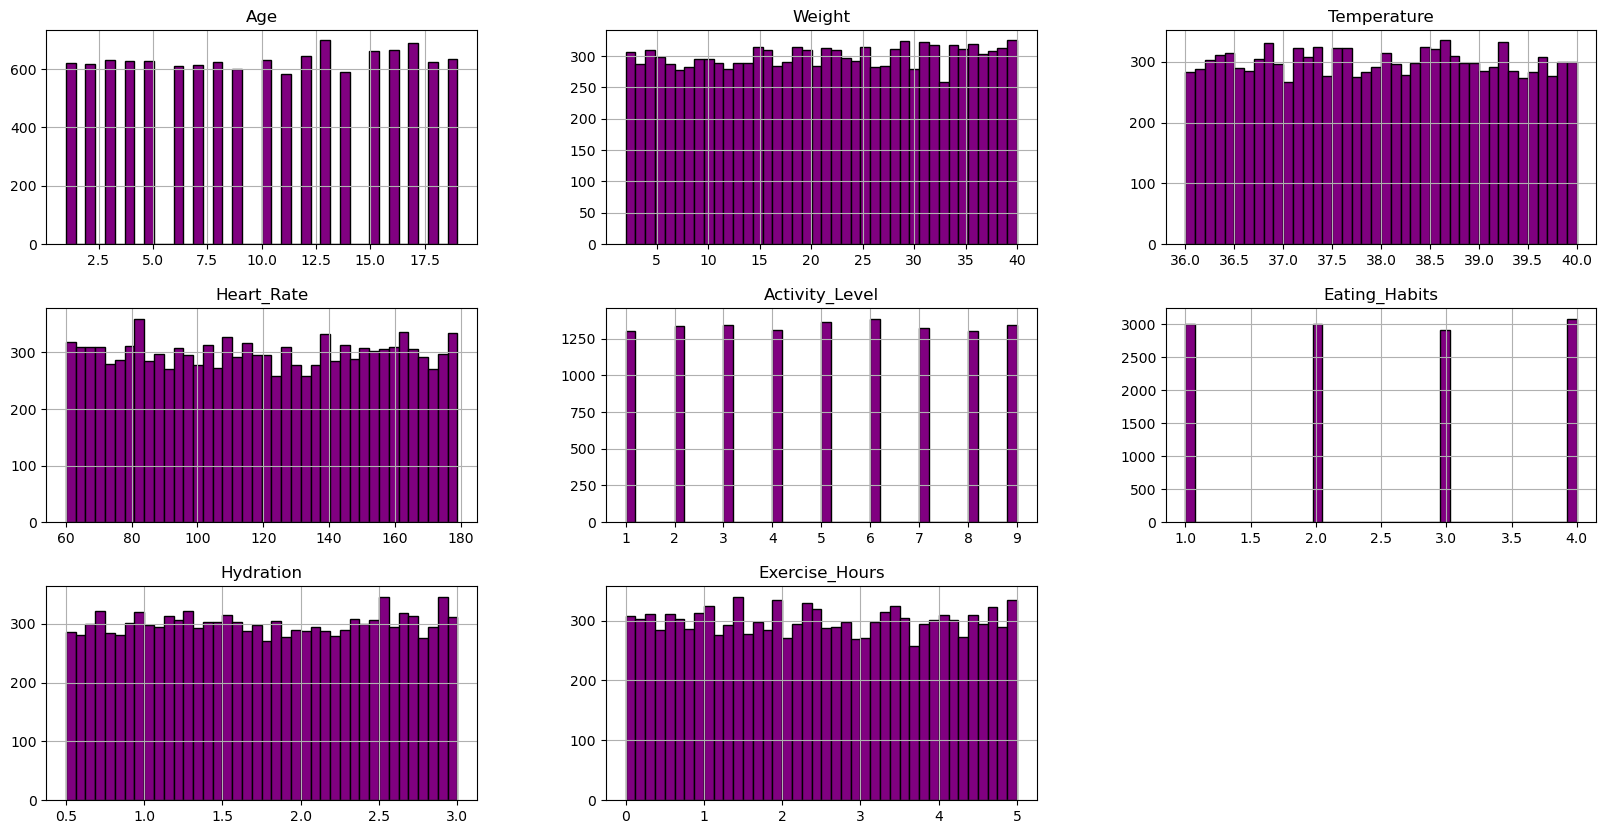

In [16]:
# Using Histogram
df.hist(bins=40, figsize=(20, 10),color='Purple', edgecolor='black')
plt.show()

C:\Users\RAM\AppData\Local\Temp\ipykernel_30200\1770867664.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=col, order=df[col].value_counts().index,
C:\Users\RAM\AppData\Local\Temp\ipykernel_30200\1770867664.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=col, order=df[col].value_counts().index,
C:\Users\RAM\AppData\Local\Temp\ipykernel_30200\1770867664.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=col, order=df[col].value_counts().index,
C:\Users\RAM\AppData\Local\Temp\ip

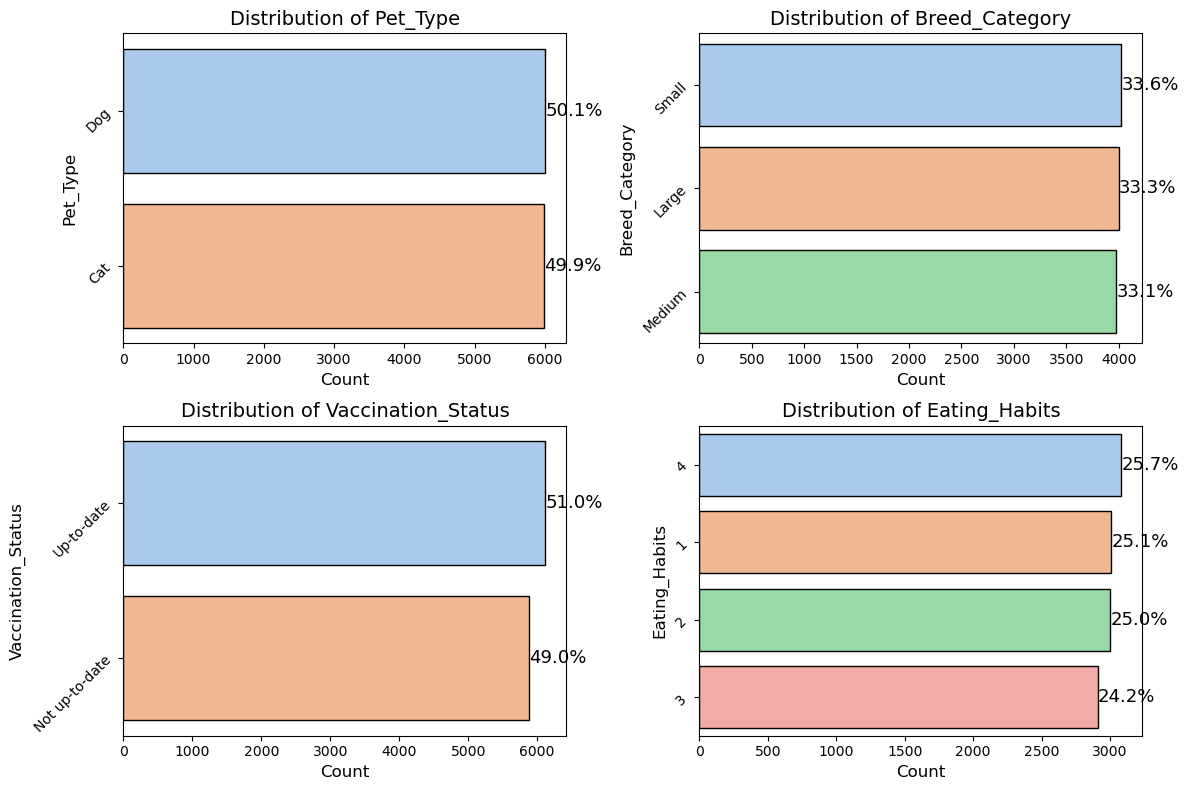

In [17]:
# Using Countplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
columns = ['Pet_Type', 'Breed_Category', 'Vaccination_Status', 'Eating_Habits']

# Drow Countplot for Each Column
for i, col in enumerate(columns):
    plt.subplot(2, len(columns) // 2, i + 1)
    ax = sns.countplot(data=df, y=col, order=df[col].value_counts().index,
                       palette="pastel", edgecolor="black")

    # Calculate Percentage
    total = len(df)
    for p in ax.patches:
        width = p.get_width()  # Use width for horizontal bars
        height = p.get_height()
        percentage = (width / total) * 100  # Calculate percentage based on width
        ax.text(width + 2, p.get_y() + height / 2, f'{percentage:.1f}%',
                va="center", fontsize=13, color="black")  # Use va="center" for vertical alignment

    plt.ylabel(col, fontsize=12)
    plt.xlabel("Count", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

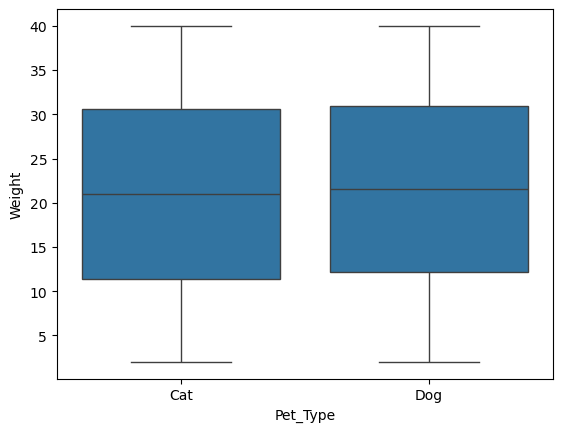

In [18]:
# Boxplot for (EstimatedSalary)
sns.boxplot(data=df,x='Pet_Type', y='Weight')
plt.show() 

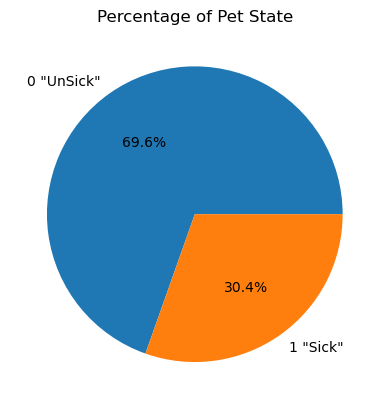

In [19]:
# Using Pie Chart
counts = df['Sick'].value_counts()

plt.pie(counts, labels=['0 "UnSick"', '1 "Sick"'], autopct='%1.1f%%')
plt.title('Percentage of Pet State')
plt.show()

In [20]:
df.drop(columns="Sick",inplace=True,axis=1)

In [21]:
df.head()

,Age,Weight,Temperature,Heart_Rate,Activity_Level,Eating_Habits,Hydration,Exercise_Hours,Pet_Type,Breed_Category,Vaccination_Status,sick
0,18,27.002131,37.072971,151,1,4,1.456332,2.912025,Cat,Medium,Not up-to-date,Rabies
1,4,5.727586,38.406675,84,6,3,1.476085,1.115939,Cat,Large,Up-to-date,Rabies
2,4,23.854278,39.749597,67,5,3,1.696218,2.861636,Dog,Medium,Up-to-date,Rabies
3,6,25.229610,36.028772,144,9,1,2.053697,0.138554,Dog,Small,Not up-to-date,Rabies
4,1,12.835061,36.980476,146,9,3,1.336203,3.913909,Cat,Medium,Not up-to-date,Rabies


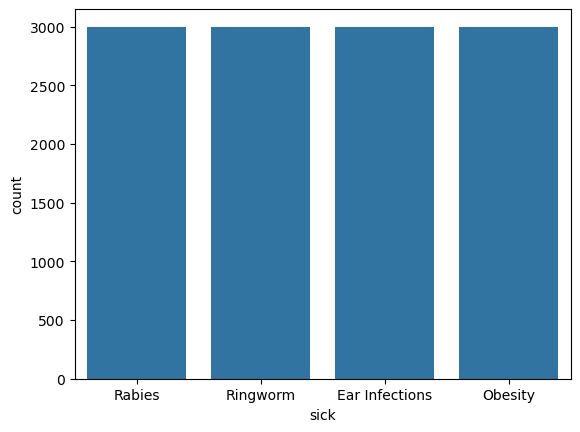

In [22]:
sns.countplot(data=df,x='sick')
plt.show()

In [23]:
# Splitting (input & output)
X = df.drop(columns="sick",axis=1)
Y = df["sick"]

In [24]:
print (X)

       Age     Weight  Temperature  Heart_Rate  Activity_Level  Eating_Habits  \
0       18  27.002131    37.072971         151               1              4   
1        4   5.727586    38.406675          84               6              3   
2        4  23.854278    39.749597          67               5              3   
3        6  25.229610    36.028772         144               9              1   
4        1  12.835061    36.980476         146               9              3   
...    ...        ...          ...         ...             ...            ...   
11995    3  28.075277    36.438101         172               3              1   
11996    6  31.510742    36.579686         155               7              2   
11997    5  31.671382    39.187926         175               5              4   
11998    4   5.753224    39.645233          69               3              2   
11999   15  15.839399    37.318812         142               1              4   

       Hydration  Exercise_

In [25]:
print (Y)

0         Rabies
1         Rabies
2         Rabies
3         Rabies
4         Rabies
          ...   
11995    Obesity
11996    Obesity
11997    Obesity
11998    Obesity
11999    Obesity
Name: sick, Length: 12000, dtype: object


In [26]:
# Encode categorical columns
label_encoders = {}
categorical_columns = ['Pet_Type', 'Breed_Category', 'Vaccination_Status']

for col in categorical_columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    X[col] = X[col].astype(int)  # تحويل العمود إلى نوع int بشكل صريح
    label_encoders[col] = le

In [27]:
# Process Data Imbalance 

In [28]:
#  Frist Step
# Splitting Data into (Test & Training) with Stratified Sampling
splitter= StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in splitter.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(12000, 11) (8400, 11) (3600, 11)


In [30]:
print(Y.shape,Y_train.shape,Y_test.shape)

(12000,) (8400,) (3600,)


In [31]:
#  Second Step(Resampling)
# Oversampling
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [32]:
# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train, Y_train)

In [26]:
!pip install xgboost

     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
     --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
     --------------------------- ------------ 0.8/1.2 MB 1.4 MB/s eta 0:00:01
     ------------------------------------ --- 1.0/1.2 MB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      INFO:xgboost.packager.build_wheel:Parsed build configuration: {'hide_cxx_symbols': True, 'use_openmp': True, 'use_cuda': False, 'use_nccl': False, 'use_dlopen_nccl': False, 'plugin_federated': False, 'plugin_rmm': False, 'use_system_libxgboost': False}
      INFO:xgboost.packager.build_wheel:Copying project files to temporary directory C:\Users\RAM\AppData\Local\Temp\tmpwp8rbwjf\whl_workspace
      INFO:xgboost.packager.build_wheel:Copying C:\Users\RAM\AppData\Local\Temp\pip-install-_45fzl1f\xgboost_375b5e799de14531948656ee01e8e141\pyproject.toml -> C:\Users\RAM\AppData\Local\Temp\tmpwp8rbwjf\whl_workspace\pyproject.toml
      INFO:xgboost.packager.build_wheel:Copying C:\Users\RAM\AppData\Local\Temp\pip-install-_45fzl1f\xgboost_375b5e799de14531948656ee01e8e141\hatch_build.py -> C:\Users\RAM\AppData\Local\Temp\tmpwp8rbwjf\whl_worksp

In [28]:
# Using Machine Learning Algorithm (Frist algorithm)
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(Y_train_resampled[Y_train_resampled == 0]) / len(Y_train_resampled[Y_train_resampled == 1]),
    random_state=42,
    reg_alpha=5,  # L1 Regularization
    reg_lambda=5  # L2 Regularization
)

# Training Model
model.fit(X_train_resampled, Y_train_resampled)

# Evaluation the Model(train)
X_train_prediction = model.predict(X_train_resampled)

# Calculate the confusion matrix 
cm_train = confusion_matrix(Y_train_resampled, X_train_prediction)
print("Confusion Matrix (Train):\n", cm_train)

# Visualize the confusion matrix for the training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Train Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# k-fold Cross-validation
# Calculate metrics for the training data (Forth Step(chooseing appropriate criteria ))
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_resampled, Y_train_resampled, cv=kf, scoring='f1')  


recall_train = recall_score(Y_train_resampled, X_train_prediction)
f1_train = f1_score(Y_train_resampled, X_train_prediction)
auc_roc_train = roc_auc_score(Y_train_resampled, X_train_prediction)
print("F1-score:", f1_train)





NameError: name 'XGBClassifier' is not defined


Confusion Matrix (Test):
 [[1241 1264]
 [ 530  565]]


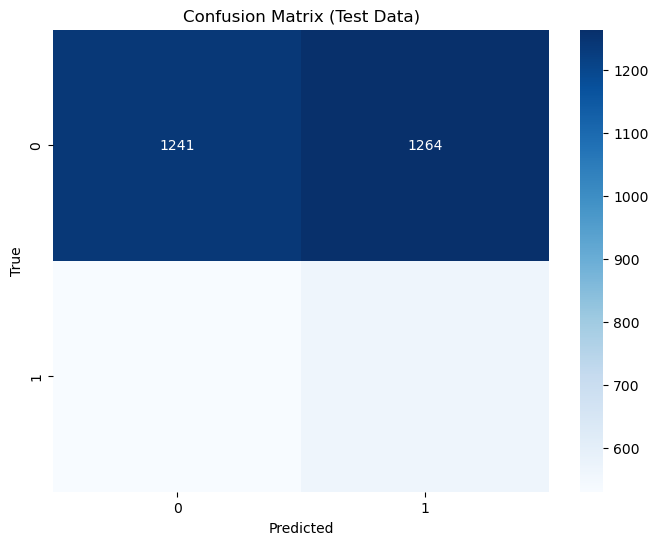


Test Data Metrics:
Recall: 0.5159817351598174
F1-score: 0.3864569083447333
AUC-ROC: 0.505695458398272
Cross-validation scores: [0.46646647 0.4765625  0.51257253 0.47692308 0.48323471]
Average score: 0.4831518582485236


In [ ]:
# Evaluate the model on the test set
X_test_prediction = model.predict(X_test)

# Calculate the confusion matrix 
cm_test = confusion_matrix(Y_test, X_test_prediction)
print("\nConfusion Matrix (Test):\n", cm_test)

# Visualize the confusion matrix for the training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# k-fold Cross-validation
# Calculate metrics for the training data (Forth Step(chooseing appropriate criteria ))
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_resampled, Y_train_resampled, cv=kf, scoring='f1')  
recall_test = recall_score(Y_test, X_test_prediction)
f1_test = f1_score(Y_test, X_test_prediction)
auc_roc_test = roc_auc_score(Y_test, X_test_prediction)

print("\nTest Data Metrics:")
print("Recall:", recall_test)
print("F1-score:", f1_test)
print("AUC-ROC:", auc_roc_test)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Confusion Matrix:
 [[2100    0    0    0]
 [   0 2100    0    0]
 [   0    0 2100    0]
 [   0    0    0 2100]]


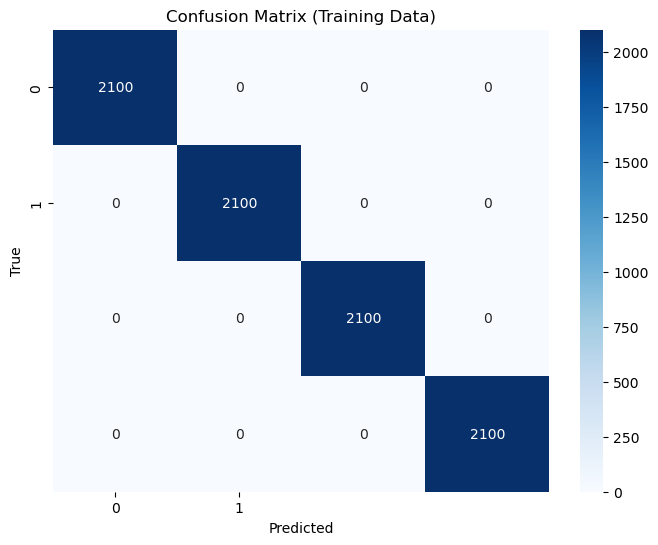


Train Data Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [37]:
# Using Machine Learning Algorithm (second algorithm)
model1 = RandomForestClassifier(n_estimators=250, random_state=50)

# Traning Model
model1.fit(X_train, Y_train)

# Evaluation the Model(train)
X_train_prediction = model1.predict(X_train)

# Calculate the confusion matrix 
cm = confusion_matrix(Y_train, X_train_prediction)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix for the training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate metrics for the training data
accuracy = accuracy_score(Y_train, X_train_prediction)
precision = precision_score(Y_train, X_train_prediction,average="weighted")
recall = recall_score(Y_train, X_train_prediction, average='weighted')
f1 = f1_score(Y_train, X_train_prediction,average='weighted') 

print("\nTrain Data Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Confusion Matrix (Test Data):
 [[2484   21]
 [1084   11]]


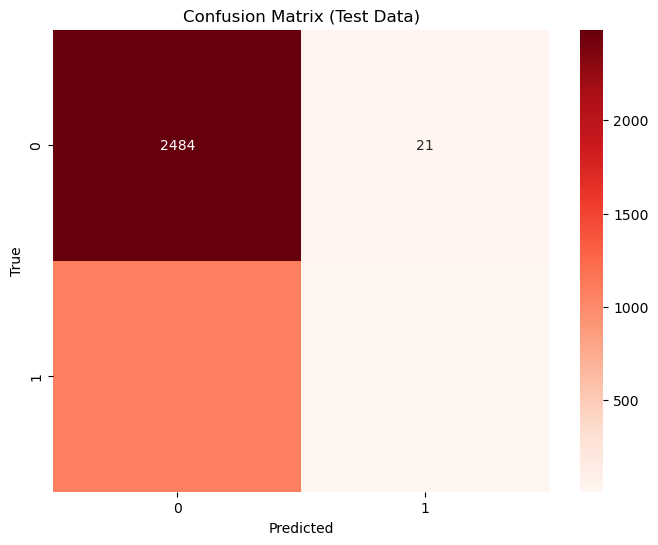


Test Data Metrics:
Accuracy: 0.6930555555555555
Precision: 0.34375
Recall: 0.01004566210045662
F1-score: 0.019520851818988466


In [ ]:
# Evaluate the model on the test set
X_test_prediction = model.predict(X_test)

# Calculate the confusion matrix for the test set
cm_test = confusion_matrix(Y_test, X_test_prediction)
print("\nConfusion Matrix (Test Data):\n", cm_test)

# Visualize the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate metrics for the test set
accuracy_test = accuracy_score(Y_test, X_test_prediction)
precision_test = precision_score(Y_test, X_test_prediction)
recall_test = recall_score(Y_test, X_test_prediction)
f1_test = f1_score(Y_test, X_test_prediction)

print("\nTest Data Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)


In [35]:
# make a folder
ARTIFACTS_FOLDER_PATH = os.path.join(os.getcwd(), "..", "artifacts")
os.makedirs(ARTIFACTS_FOLDER_PATH, exist_ok=True)


In [38]:
joblib.dump(model1, os.path.join(ARTIFACTS_FOLDER_PATH, 'model.pkl'), compress=5)

['e:\\FCAI\\LEVEL 4\\Graduation Project\\sorce code\\Pet_Health_Ml\\notebooks\\..\\artifacts\\model.pkl']

C:\Users\SCS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[5845    0]
 [2555    0]]


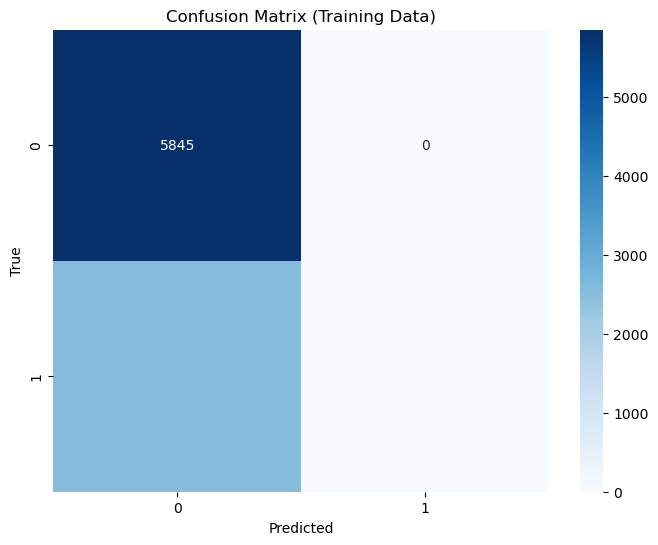


Train Data Metrics:
Accuracy: 0.6958333333333333
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\SCS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Using Machine Learning Algorithm (Third algorithm)
Model = LogisticRegression(max_iter=100)

# Training the Model
Model.fit(X_train, Y_train)

# Evaluate the Model on training data
X_train_prediction = Model.predict(X_train)

# Calculate the confusion matrix 
cm = confusion_matrix(Y_train, X_train_prediction)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix for the training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate metrics for the training data
accuracy = accuracy_score(Y_train, X_train_prediction)
precision = precision_score(Y_train, X_train_prediction)
recall = recall_score(Y_train, X_train_prediction)
f1 = f1_score(Y_train, X_train_prediction)

print("\nTrain Data Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Confusion Matrix (Test Data):
 [[2484   21]
 [1084   11]]


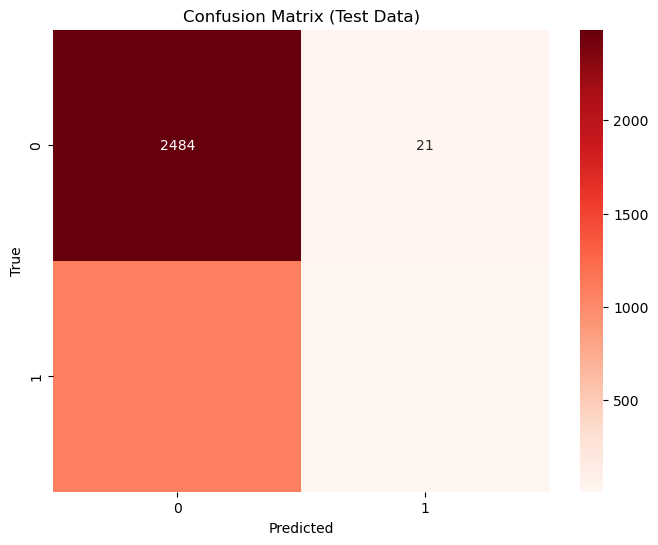


Test Data Metrics:
Accuracy: 0.6930555555555555
Precision: 0.34375
Recall: 0.01004566210045662
F1-score: 0.019520851818988466


In [ ]:
# Evaluate the model on the test set
X_test_prediction = model.predict(X_test)

# Calculate the confusion matrix for the test set
cm_test = confusion_matrix(Y_test, X_test_prediction)
print("\nConfusion Matrix (Test Data):\n", cm_test)

# Visualize the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate metrics for the test set
accuracy_test = accuracy_score(Y_test, X_test_prediction)
precision_test = precision_score(Y_test, X_test_prediction)
recall_test = recall_score(Y_test, X_test_prediction)
f1_test = f1_score(Y_test, X_test_prediction)

print("\nTest Data Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)


In [332]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [334]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Example of random data - replace with your own data
X = np.random.rand(1000, 20)  
y = np.random.randint(0, 2, 1000)  

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the neural network model with enhancements
model = Sequential([
    Dense(128, input_dim=20),  
    LeakyReLU(alpha=0.01),
    BatchNormalization(), 
    Dense(64),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),  
    Dense(32),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),  
    Dense(1, activation='sigmoid')  
])

# Optimizing the model using Adam Optimizer with Learning Rate Scheduler
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Reduce learning rate if improvement stops
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, min_lr=0.0001)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, callbacks=[lr_scheduler])

# Predict using the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Compute F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


C:\Users\SCS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\SCS\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5561 - loss: 0.8062 - learning_rate: 0.0010
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6025 - loss: 0.6682 - learning_rate: 0.0010
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7068 - loss: 0.5820 - learning_rate: 0.0010
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6949 - loss: 0.5620 - learning_rate: 0.0010
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7675 - loss: 0.5101 - learning_rate: 0.0010
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7879 - loss: 0.5131 - learning_rate: 0.0010
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7989 - loss: 0.4587 - learning_rate: 0.0010
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8320 - loss: 0.4180 - learning_rate: 0.0010
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8553 - loss: 0.4086 - learning_rate: 0.0010
Epoch 10/20
22/22 ━━━━━━━━━━